In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import scipy
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [2]:
data = pd.read_excel("Datasets/Students_Performance_data_set.xlsx")

In [3]:
data

,University Admission year,Gender,Age,H.S.C passing year,Current Semester,Do you have meritorious scholarship ?,Do you use University transportation?,How many hour do you study daily?,What is your preferable learning mode?,Do you use smart phone?,...,How many hour do you spent daily on your skill development?,What is your relationship status?,Are you engaged with any co-curriculum activities?,With whom you are living with?,Do you have any health issues?,What was your previous SGPA?,Do you have any physical disabilities?,What is your current CGPA?,How many Credit did you have completed?,What is your monthly family income?
0,2018,Male,24,2016,12,Yes,No,3,Offline,Yes,...,2,Single,Yes,Bachelor,No,NaN,No,NaN,NaN,25000
1,2021,Male,22,2020,4,Yes,Yes,3,Online,Yes,...,2,Single,Yes,Family,No,NaN,No,NaN,NaN,100000
2,2020,Female,21,2019,5,No,No,3,Offline,Yes,...,1,Single,No,Bachelor,No,NaN,No,NaN,NaN,50000
3,2021,Male,20,2020,4,Yes,No,1,Offline,Yes,...,1,Single,No,Bachelor,Yes,NaN,No,NaN,NaN,62488
4,2021,Male,22,2019,4,Yes,No,3,Online,Yes,...,1,In a relationship,No,Bachelor,Yes,NaN,No,NaN,NaN,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2021,Female,20,2020,8,No,Yes,1,Offline,Yes,...,2,Single,No,Bachelor,No,2.55,No,3.6,135,180000
1096,2022,Female,19,2020,8,Yes,Yes,4,Offline,Yes,...,2,Single,Yes,Family,No,2.56,No,3.89,29,200000
1097,2021,Male,24,2020,9,Yes,Yes,3,Online,Yes,...,2,Single,Yes,Family,No,2.87,No,3.94,143,200000
1098,2019,Female,24,2018,11,No,No,5,Offline,Yes,...,4,Single,Yes,Bachelor,No,2.48,No,3.78,144,210000


In [4]:
data.isnull().sum()

University Admission year                                                       0
Gender                                                                          0
Age                                                                             1
H.S.C passing year                                                              0
Current Semester                                                                0
Do you have meritorious scholarship ?                                           0
Do you use University transportation?                                           5
How many hour do you study daily?                                               0
What is your preferable learning mode?                                          0
Do you use smart phone?                                                         0
Do you have personal Computer?                                                  0
How many hour do you spent daily in social media?                               0
Status of your E

In [5]:
data=data.rename(columns={'How many Credit did you have completed?':'comp_cred','What is your current CGPA?':'cgpa',
                        'What was your previous SGPA?':'sgpa','What is your monthly family income?':'Family_inc','Do you have any physical disabilities?':'phy_disb',
                          'Do you have any health issues?':'phy_issue',
                          'With whom you are living with?':'living_sts',
                          'Are you engaged with any co-curriculum activities?':'co_curri_act',
                          'What is your relationship status?':'relation_sts',
                          'How many hour do you spent daily on your skill development?':'skill_dev_hour',
                          'What are the skills do you have ?':'skills',
                          'Do you attend in teacher consultancy for any kind of academical problems? ':'faculty_consultency',
                          'Did you ever got suspension?':'suspension',
                          'Did you ever fall in probation?':'probation',
                          'Average attendance on class':'avg_attendance',
                          'Status of your English language proficiency':'english_skill',
                          'How many hour do you spent daily in social media?':'social_media_time',
                          'Do you have personal Computer?':'has_PC',
                          'Do you use smart phone?':'has_smart_phone',
                          'What is your preferable learning mode?':'learning_mode',
                          'How many times do you seat for study in a day?':'freq_study/day',
                          'How many hour do you study daily?':'study_hour/day',
                          'Do you use University transportation?':'use_uni_transport',
                          'Do you have meritorious scholarship ?':'merit_scholarship',
                          'Current Semester':'currnt_sem','University Name':'uni_name',
                          'University Admission year':'uni_admssn_year',
                          'H.S.C passing year':'hsc_pass_year'
                       },inplace=False)

In [6]:
data.head()

,uni_admssn_year,Gender,Age,hsc_pass_year,currnt_sem,merit_scholarship,use_uni_transport,study_hour/day,learning_mode,has_smart_phone,...,skill_dev_hour,relation_sts,co_curri_act,living_sts,phy_issue,sgpa,phy_disb,cgpa,comp_cred,Family_inc
0,2018,Male,24,2016,12,Yes,No,3,Offline,Yes,...,2,Single,Yes,Bachelor,No,NaN,No,NaN,NaN,25000
1,2021,Male,22,2020,4,Yes,Yes,3,Online,Yes,...,2,Single,Yes,Family,No,NaN,No,NaN,NaN,100000
2,2020,Female,21,2019,5,No,No,3,Offline,Yes,...,1,Single,No,Bachelor,No,NaN,No,NaN,NaN,50000
3,2021,Male,20,2020,4,Yes,No,1,Offline,Yes,...,1,Single,No,Bachelor,Yes,NaN,No,NaN,NaN,62488
4,2021,Male,22,2019,4,Yes,No,3,Online,Yes,...,1,In a relationship,No,Bachelor,Yes,NaN,No,NaN,NaN,50000


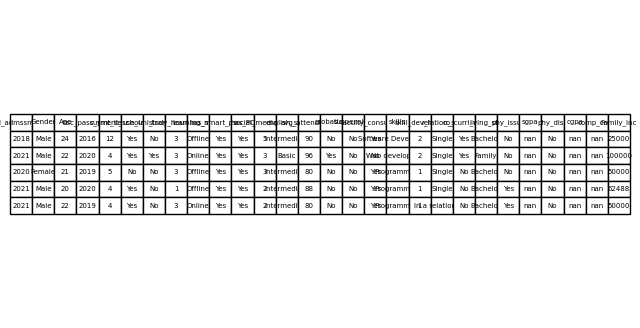

In [7]:
df = data.head()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Hide the axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(5)

# Save the table as a figure
plt.savefig('Diagram/data_head_figure.png', bbox_inches='tight', dpi=300)

# Show the saved figure
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   uni_admssn_year      1100 non-null   int64 
 1   Gender               1100 non-null   object
 2   Age                  1099 non-null   object
 3   hsc_pass_year        1100 non-null   int64 
 4   currnt_sem           1100 non-null   int64 
 5   merit_scholarship    1100 non-null   object
 6   use_uni_transport    1095 non-null   object
 7   study_hour/day       1100 non-null   int64 
 8   learning_mode        1100 non-null   object
 9   has_smart_phone      1100 non-null   object
 10  has_PC               1100 non-null   object
 11  social_media_time    1100 non-null   int64 
 12  english_skill        1100 non-null   object
 13  avg_attendance       1100 non-null   object
 14  probation            1100 non-null   object
 15  suspension           1100 non-null   object
 16  facult

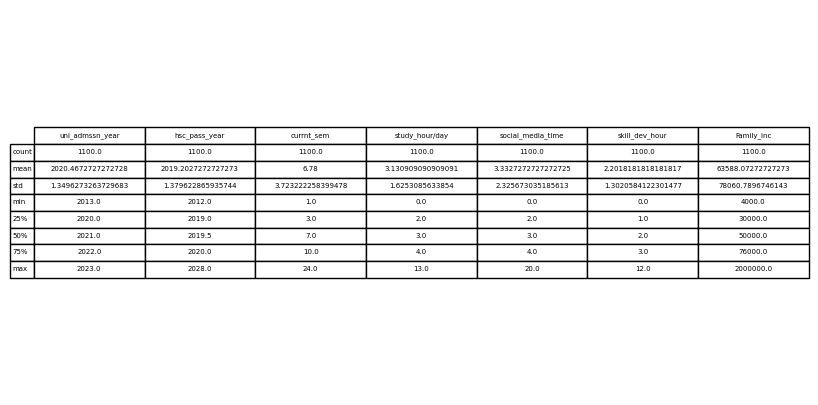

In [9]:
df_describe = data.describe()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=df_describe.values, colLabels=df_describe.columns, rowLabels=df_describe.index, cellLoc='center', loc='center')

# Adjust the font size
table.auto_set_font_size(False)
table.set_fontsize(5)

# Save the table as a figure
plt.savefig('Diagram/data_describe_figure.png', bbox_inches='tight', dpi=300)

# Show the saved figure
plt.show()

In [10]:
data['use_uni_transport'] = data['use_uni_transport'].fillna(data['use_uni_transport'].mode()[0])

In [11]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

In [12]:
mean_age = data['Age'].mean()

In [13]:
data['Age'] = data['Age'].fillna(mean_age)

In [14]:
data['social_media_time'] = pd.to_numeric(data['social_media_time'], errors='coerce')

In [15]:
mean_value = data['social_media_time'].mean()

In [16]:
data['social_media_time'] = data['social_media_time'].fillna(mean_value)

In [17]:
data['avg_attendance'] = pd.to_numeric(data['avg_attendance'], errors='coerce')

In [18]:
mean_value = data['avg_attendance'].mean()

In [19]:
data['avg_attendance'] = data['avg_attendance'].fillna(mean_value)

In [20]:
data['co_curri_act'] = data['co_curri_act'].fillna(data['co_curri_act'].mode()[0])

In [21]:
data.isnull().sum()

uni_admssn_year          0
Gender                   0
Age                      0
hsc_pass_year            0
currnt_sem               0
merit_scholarship        0
use_uni_transport        0
study_hour/day           0
learning_mode            0
has_smart_phone          0
has_PC                   0
social_media_time        0
english_skill            0
avg_attendance           0
probation                0
suspension               0
faculty_consultency      0
skills                   0
skill_dev_hour           0
relation_sts             0
co_curri_act             0
living_sts               0
phy_issue                0
sgpa                   139
phy_disb                 0
cgpa                   141
comp_cred              140
Family_inc               0
dtype: int64

In [22]:
data.drop(['skills'],axis=1,inplace=True)
data.drop(['skill_dev_hour'],axis=1,inplace=True)

In [23]:
data

,uni_admssn_year,Gender,Age,hsc_pass_year,currnt_sem,merit_scholarship,use_uni_transport,study_hour/day,learning_mode,has_smart_phone,...,faculty_consultency,relation_sts,co_curri_act,living_sts,phy_issue,sgpa,phy_disb,cgpa,comp_cred,Family_inc
0,2018,Male,24.0,2016,12,Yes,No,3,Offline,Yes,...,Yes,Single,Yes,Bachelor,No,NaN,No,NaN,NaN,25000
1,2021,Male,22.0,2020,4,Yes,Yes,3,Online,Yes,...,No,Single,Yes,Family,No,NaN,No,NaN,NaN,100000
2,2020,Female,21.0,2019,5,No,No,3,Offline,Yes,...,Yes,Single,No,Bachelor,No,NaN,No,NaN,NaN,50000
3,2021,Male,20.0,2020,4,Yes,No,1,Offline,Yes,...,Yes,Single,No,Bachelor,Yes,NaN,No,NaN,NaN,62488
4,2021,Male,22.0,2019,4,Yes,No,3,Online,Yes,...,Yes,In a relationship,No,Bachelor,Yes,NaN,No,NaN,NaN,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,2021,Female,20.0,2020,8,No,Yes,1,Offline,Yes,...,No,Single,No,Bachelor,No,2.55,No,3.6,135,180000
1096,2022,Female,19.0,2020,8,Yes,Yes,4,Offline,Yes,...,Yes,Single,Yes,Family,No,2.56,No,3.89,29,200000
1097,2021,Male,24.0,2020,9,Yes,Yes,3,Online,Yes,...,Yes,Single,Yes,Family,No,2.87,No,3.94,143,200000
1098,2019,Female,24.0,2018,11,No,No,5,Offline,Yes,...,Yes,Single,Yes,Bachelor,No,2.48,No,3.78,144,210000


In [24]:
data.drop(['Family_inc'],axis=1,inplace=True)

In [25]:
data.drop(['phy_issue'],axis=1,inplace=True)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uni_admssn_year      1100 non-null   int64  
 1   Gender               1100 non-null   object 
 2   Age                  1100 non-null   float64
 3   hsc_pass_year        1100 non-null   int64  
 4   currnt_sem           1100 non-null   int64  
 5   merit_scholarship    1100 non-null   object 
 6   use_uni_transport    1100 non-null   object 
 7   study_hour/day       1100 non-null   int64  
 8   learning_mode        1100 non-null   object 
 9   has_smart_phone      1100 non-null   object 
 10  has_PC               1100 non-null   object 
 11  social_media_time    1100 non-null   int64  
 12  english_skill        1100 non-null   object 
 13  avg_attendance       1100 non-null   float64
 14  probation            1100 non-null   object 
 15  suspension           1100 non-null   o

In [27]:
data.isnull().sum()

uni_admssn_year          0
Gender                   0
Age                      0
hsc_pass_year            0
currnt_sem               0
merit_scholarship        0
use_uni_transport        0
study_hour/day           0
learning_mode            0
has_smart_phone          0
has_PC                   0
social_media_time        0
english_skill            0
avg_attendance           0
probation                0
suspension               0
faculty_consultency      0
relation_sts             0
co_curri_act             0
living_sts               0
sgpa                   139
phy_disb                 0
cgpa                   141
comp_cred              140
dtype: int64

In [28]:
print("\nColumn names (one by one):")
for column in data.columns:
    print(column)


Column names (one by one):
uni_admssn_year
Gender
Age
hsc_pass_year
currnt_sem
merit_scholarship
use_uni_transport
study_hour/day
learning_mode
has_smart_phone
has_PC
social_media_time
english_skill
avg_attendance
probation
suspension
faculty_consultency
relation_sts
co_curri_act
living_sts
sgpa
phy_disb
cgpa
comp_cred


In [29]:
pd.value_counts(data['uni_admssn_year'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\1396193184.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['uni_admssn_year'])


uni_admssn_year
2021    310
2020    275
2022    272
2019    165
2018     49
2017     11
2023      6
2015      5
2016      3
2014      3
2013      1
Name: count, dtype: int64

In [30]:
pd.value_counts(data['Gender'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3390917704.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['Gender'])


Gender
Male      623
Female    477
Name: count, dtype: int64

In [31]:
pd.value_counts(data['currnt_sem'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\1300316922.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['currnt_sem'])


currnt_sem
2     193
11    154
8     147
9      97
3      90
10     88
4      74
5      64
7      59
6      55
1      23
12     21
14     12
13      8
15      5
22      3
17      2
21      1
18      1
19      1
16      1
24      1
Name: count, dtype: int64

In [32]:
pd.value_counts(data['merit_scholarship'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3829148098.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['merit_scholarship'])


merit_scholarship
No     624
Yes    476
Name: count, dtype: int64

In [33]:
pd.value_counts(data['use_uni_transport'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3703047855.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['use_uni_transport'])


use_uni_transport
No     671
Yes    429
Name: count, dtype: int64

In [34]:
pd.value_counts(data['study_hour/day'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3494756805.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['study_hour/day'])


study_hour/day
2     292
3     285
4     166
1     141
5     118
6      55
7      18
8      13
0       7
9       3
10      1
13      1
Name: count, dtype: int64

In [35]:
data['study_hour/day'].replace(13,3,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3741645831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['study_hour/day'].replace(13,3,inplace=True)


In [36]:
pd.value_counts(data['study_hour/day'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3494756805.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['study_hour/day'])


study_hour/day
2     292
3     286
4     166
1     141
5     118
6      55
7      18
8      13
0       7
9       3
10      1
Name: count, dtype: int64

In [37]:
pd.value_counts(data['learning_mode'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\427608125.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['learning_mode'])


learning_mode
Offline    785
Online     315
Name: count, dtype: int64

In [38]:
pd.value_counts(data['has_smart_phone'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2942888168.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['has_smart_phone'])


has_smart_phone
Yes    1087
No       13
Name: count, dtype: int64

In [39]:
pd.value_counts(data['has_PC'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2011109617.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['has_PC'])


has_PC
Yes    1016
No       84
Name: count, dtype: int64

In [40]:
pd.value_counts(data['social_media_time'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2745454031.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['social_media_time'])


social_media_time
2     316
3     270
1     174
4     102
5      72
6      57
7      38
8      28
10     15
9      10
12      8
15      3
11      3
0       2
16      1
20      1
Name: count, dtype: int64

In [41]:
data['social_media_time'].replace(20,8,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\928038025.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['social_media_time'].replace(20,8,inplace=True)


In [42]:
data['social_media_time'].replace(16,8,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\1831442277.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['social_media_time'].replace(16,8,inplace=True)


In [43]:
data['social_media_time'].replace(15,8,inplace=True)
data['social_media_time'].replace(11,8,inplace=True)
data['social_media_time'].replace(12,8,inplace=True)
data['social_media_time'].replace(9,8,inplace=True)
data['social_media_time'].replace(0,1,inplace=True)
data['social_media_time'].replace(10,8,inplace=True)
data['social_media_time'].replace(7,6,inplace=True)
data['social_media_time'].replace(8,6,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\593197730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['social_media_time'].replace(15,8,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\593197730.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [44]:
pd.value_counts(data['social_media_time'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2745454031.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['social_media_time'])


social_media_time
2    316
3    270
1    176
6    164
4    102
5     72
Name: count, dtype: int64

In [45]:
pd.value_counts(data['english_skill'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2129462165.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['english_skill'])


english_skill
Intermediate    625
Basic           272
Advance         203
Name: count, dtype: int64

In [46]:
pd.value_counts(data['probation'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\60758534.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['probation'])


probation
No     830
Yes    270
Name: count, dtype: int64

In [47]:
pd.value_counts(data['suspension'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\1777159595.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['suspension'])


suspension
No     1058
Yes      42
Name: count, dtype: int64

In [48]:
pd.value_counts(data['faculty_consultency'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3899589180.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['faculty_consultency'])


faculty_consultency
Yes    604
No     496
Name: count, dtype: int64

In [49]:
pd.value_counts(data['relation_sts'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\1490633802.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['relation_sts'])


relation_sts
Single               825
In a relationship    172
Married               88
Engaged               15
Name: count, dtype: int64

In [50]:
pd.value_counts(data['co_curri_act'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2613773119.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['co_curri_act'])


co_curri_act
No     639
Yes    461
Name: count, dtype: int64

In [51]:
pd.value_counts(data['living_sts'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3760468890.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['living_sts'])


living_sts
Family      588
Bachelor    512
Name: count, dtype: int64

In [52]:
pd.value_counts(data['sgpa'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\826368891.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['sgpa'])


sgpa
4.00    21
2.56    17
1.56    16
2.67    14
3.70    14
        ..
1.33     1
2.71     1
2.43     1
1.38     1
1.50     1
Name: count, Length: 253, dtype: int64

In [53]:
pd.value_counts(data['cgpa'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2389866216.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['cgpa'])


cgpa
3.7      20
3.9      19
3.8      19
3.5      19
3.78     17
         ..
2.33      1
3..11     1
2.78      1
2.47      1
3.96      1
Name: count, Length: 194, dtype: int64

In [54]:
pd.value_counts(data['phy_disb'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3545841455.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['phy_disb'])


phy_disb
No     1076
Yes      24
Name: count, dtype: int64

In [55]:
pd.value_counts(data['avg_attendance'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3057100772.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['avg_attendance'])


avg_attendance
100.0    324
90.0     170
95.0      96
80.0      90
70.0      47
        ... 
31.0       1
64.0       1
24.0       1
81.0       1
53.0       1
Name: count, Length: 65, dtype: int64

In [56]:
data['avg_attendance'].unique()

array([ 90.        ,  96.        ,  80.        ,  88.        ,
        95.        , 100.        ,  97.        ,  70.        ,
        98.        ,  85.        ,  99.        ,  75.        ,
        82.        ,  92.        ,  50.        ,  73.        ,
         2.        ,  87.        ,  40.        ,   5.        ,
        52.        ,  65.        ,  77.        ,  60.        ,
        87.86897179,  10.        ,  93.        ,  78.        ,
        57.        ,  91.        ,  86.        ,   0.        ,
        94.        ,  54.        ,  68.        ,  45.        ,
        46.        ,  51.        ,  34.        ,  56.        ,
        76.        ,  63.        ,  89.        ,  79.        ,
        35.        ,  62.        ,  41.        ,  83.        ,
        84.        ,  67.        ,  72.        ,  42.        ,
        47.        ,  23.        ,  55.        ,  32.        ,
        66.        ,  30.        ,  43.        ,  71.        ,
        31.        ,  64.        ,  24.        ,  81.  

In [57]:
data['avg_attendance'].replace(2,60,inplace=True)
data['avg_attendance'].replace('94-98',95,inplace=True)
data['avg_attendance'].replace(5,50,inplace=True)
data['avg_attendance'].replace(0,50,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\245294012.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['avg_attendance'].replace(2,60,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\245294012.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [58]:
data['avg_attendance'].unique()

array([ 90.        ,  96.        ,  80.        ,  88.        ,
        95.        , 100.        ,  97.        ,  70.        ,
        98.        ,  85.        ,  99.        ,  75.        ,
        82.        ,  92.        ,  50.        ,  73.        ,
        60.        ,  87.        ,  40.        ,  52.        ,
        65.        ,  77.        ,  87.86897179,  10.        ,
        93.        ,  78.        ,  57.        ,  91.        ,
        86.        ,  94.        ,  54.        ,  68.        ,
        45.        ,  46.        ,  51.        ,  34.        ,
        56.        ,  76.        ,  63.        ,  89.        ,
        79.        ,  35.        ,  62.        ,  41.        ,
        83.        ,  84.        ,  67.        ,  72.        ,
        42.        ,  47.        ,  23.        ,  55.        ,
        32.        ,  66.        ,  30.        ,  43.        ,
        71.        ,  31.        ,  64.        ,  24.        ,
        81.        ,  53.        ])

In [59]:
data['avg_attendance'].replace(87.86897179,87,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2847158191.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['avg_attendance'].replace(87.86897179,87,inplace=True)


In [60]:
data['avg_attendance'].unique()

array([ 90.        ,  96.        ,  80.        ,  88.        ,
        95.        , 100.        ,  97.        ,  70.        ,
        98.        ,  85.        ,  99.        ,  75.        ,
        82.        ,  92.        ,  50.        ,  73.        ,
        60.        ,  87.        ,  40.        ,  52.        ,
        65.        ,  77.        ,  87.86897179,  10.        ,
        93.        ,  78.        ,  57.        ,  91.        ,
        86.        ,  94.        ,  54.        ,  68.        ,
        45.        ,  46.        ,  51.        ,  34.        ,
        56.        ,  76.        ,  63.        ,  89.        ,
        79.        ,  35.        ,  62.        ,  41.        ,
        83.        ,  84.        ,  67.        ,  72.        ,
        42.        ,  47.        ,  23.        ,  55.        ,
        32.        ,  66.        ,  30.        ,  43.        ,
        71.        ,  31.        ,  64.        ,  24.        ,
        81.        ,  53.        ])

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uni_admssn_year      1100 non-null   int64  
 1   Gender               1100 non-null   object 
 2   Age                  1100 non-null   float64
 3   hsc_pass_year        1100 non-null   int64  
 4   currnt_sem           1100 non-null   int64  
 5   merit_scholarship    1100 non-null   object 
 6   use_uni_transport    1100 non-null   object 
 7   study_hour/day       1100 non-null   int64  
 8   learning_mode        1100 non-null   object 
 9   has_smart_phone      1100 non-null   object 
 10  has_PC               1100 non-null   object 
 11  social_media_time    1100 non-null   int64  
 12  english_skill        1100 non-null   object 
 13  avg_attendance       1100 non-null   float64
 14  probation            1100 non-null   object 
 15  suspension           1100 non-null   o

In [62]:
data['avg_attendance'] = data['avg_attendance'].astype('int64')
print(data['avg_attendance'].dtypes)

int64


In [63]:
data['Age'].unique()

array([24.        , 22.        , 21.        , 20.        , 19.        ,
       25.        , 23.        , 26.        , 27.        , 23.6       ,
       18.        , 21.38852459])

In [64]:
data['Age'] = data['Age'].astype('int64')
print(data['Age'].dtypes)

int64


In [65]:
data['Age'].unique()

array([24, 22, 21, 20, 19, 25, 23, 26, 27, 18])

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   uni_admssn_year      1100 non-null   int64 
 1   Gender               1100 non-null   object
 2   Age                  1100 non-null   int64 
 3   hsc_pass_year        1100 non-null   int64 
 4   currnt_sem           1100 non-null   int64 
 5   merit_scholarship    1100 non-null   object
 6   use_uni_transport    1100 non-null   object
 7   study_hour/day       1100 non-null   int64 
 8   learning_mode        1100 non-null   object
 9   has_smart_phone      1100 non-null   object
 10  has_PC               1100 non-null   object
 11  social_media_time    1100 non-null   int64 
 12  english_skill        1100 non-null   object
 13  avg_attendance       1100 non-null   int64 
 14  probation            1100 non-null   object
 15  suspension           1100 non-null   object
 16  facult

In [67]:
data['sgpa'].unique()

array([nan, 3.8, 3.4, 3.93, 3.1, 3.81, 3.89, 3.79, 3.55, 3.28, 3.78, 4,
       3.9, 3.84, 3.31, 3.49, 3.07, 3.76, 2.7, 3.65, 3.5, 3.38, 1.89, 3.7,
       2.2, 2.6, 2.87, 2.98, 3.52, 3.48, 3.16, 1.92, 3.29, 2, 3.3, 3.01,
       3.2, 2.4, 2.16, 1.75, 3.33, 3.25, 3.46, 3.73, 3.42, 3.26, 3.82,
       3.85, 2.67, 3.72, 3.51, 2.65, 1.96, 2.8, 3.36, 2.11, 2.83, 2.81,
       3.68, 3.64, 3.56, 1.68, 2.54, 3.14, 3.69, 2.73, 2.61, 1.52, 3.12,
       2.25, 3.83, 1.98, 3.37, 2.79, 3.18, 2.49, 4.59, 3.86, 0, 3.58,
       2.57, 2.45, 3.47, 2.53, 2.56, 2.36, 3.19, '2:11', 3.6, 3.75, 2.68,
       3.39, 3.03, 3.61, 5, 3, 1.61, 2.94, 1.53, 2.32, 2.89, 2.26, 3.45,
       2.93, 3.06, 3.92, 3.17, 3.63, 3.98, 2.96, 3.96, 2.86, 2.52, 3.34,
       1.05, 2.06, 3.67, 1.63, 2.55, 3.74, 2.1, 2.72, 3.21, 3.95, 2.59,
       3.53, 3.43, 3.02, '2:69', 3.05, 4.5, 2.18, 3.62, 3.88, 3.97, 3.77,
       3.44, '2,48', 2.58, 2.17, 1.12, 4.55, 2.44, 2.82, 3.54, 2.08, 1.62,
       2.9, 3.13, '1,42', 2.5, 3.24, 2.3, 3.87, 2.02,

In [68]:
data['cgpa'].unique()

array([nan, 3.64, 3.53, 3.89, 3.5, 3.65, 3.81, 3.82, 3.48, 3.32, 3.88, 4,
       3.9, 3.8, 3.52, 3.67, 2.74, 2.8, 3.1, 3.58, 2.69, 3.77, 2.66, 2.6,
       2.91, 2.99, 2.92, 2.96, 2.9, 3.08, 2.68, 2.42, 3.23, 2.22, 3.24,
       2.76, 3.3, 2.4, 2.75, 2.31, 2.51, '2. 81', 3.92, 3.25, 3.73, 2,
       3.56, 3.02, 3.2, 3.26, 3.68, 3.72, 2.84, 2.67, 3.6, 3.35, 3.42,
       1.96, 3.59, 2.54, 3.05, 2.2, 3.22, 0, 3.78, 3.75, 3.39, 3.14, 3,
       2.61, 2.15, 3.33, 2.64, 3.43, 3.83, 2.98, 3.37, 3.79, 2.89, 3.18,
       3.03, 4.67, 3.7, 3.4, 2.95, 2.72, 2.56, 2.73, '2:13', 3.07, 3.38,
       'No', 3.21, 3.45, 3.74, 3.36, 3.01, 3.93, 3.55, 2.44, 3.15, 3.27,
       3.19, 2.88, 2.43, 3.44, 3.09, 3.95, 3.84, 3.94, 3.63, 3.86, 2.52,
       3.71, 3.99, 3.61, 2.94, 2.97, 3.91, 2.55, 3.62, 3.97, 2.1, 2.25,
       2.01, 3.295, 3.69, 3.29, 3.41, '2:69', 2.81, 2.08, 3.66, '2,74',
       2.93, 3.76, 3.06, 1.88, 2.82, 3.98, 1.45, 3.17, 1.42, 3.13, 3.85,
       3.54, 2.5, 3.47, 2.86, 'C.42', 2.87, 2.77, 2.85, 4

In [69]:
data['comp_cred'].unique()

array([nan, 35, 34, 39, 11, 12, 80, 132, 71, 85, 83, 73, 27, 86, 110, 90,
       120, 76, 118, 100, 68, 121, 114, 77, 105, 79, 103, 70, 46, 75, 33,
       102, 136, 122, 78, 126, 133, 84, 125, 131, 130, '80', 37, '30',
       104, 14, 89, 115, 88, 99, 117, 101, 123, 23, 24, 26, 40, 25, 49, 0,
       55, 45, 65, 107, 128, 48, 50, 30, 20, 53, 36, 60, 87, 58, '120',
       141, 42, 22, 10, 62, 54, 13, 140, 111, 124, 106, 44, 32, '132', 5,
       139, 113, 21, 116, 93, 64, 95, 18, 92, 15, 6, '70-85', 147, 8, 91,
       72, 96, '136', 112, 28, 31, 129, 119, 127, 135, 67, 143, 63, 97,
       98, 66, 144, 145, 142, 137, 138, 59, 134, 81, 109, 56, 108, 61, 74,
       16, 29, 51, 43], dtype=object)

In [70]:
newdata=pd.read_excel("Datasets/Not null.xlsx")

In [71]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   What was your previous SGPA?             1100 non-null   float64
 1   What is your current CGPA?               1100 non-null   float64
 2   How many Credit did you have completed?  1100 non-null   int64  
 3   Unnamed: 3                               1 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 34.5 KB


In [72]:
data['sgpa']=newdata['What was your previous SGPA?']

In [73]:
data['cgpa']=newdata['What is your current CGPA?']

In [74]:
data['comp_cred']=newdata['How many Credit did you have completed?']

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uni_admssn_year      1100 non-null   int64  
 1   Gender               1100 non-null   object 
 2   Age                  1100 non-null   int64  
 3   hsc_pass_year        1100 non-null   int64  
 4   currnt_sem           1100 non-null   int64  
 5   merit_scholarship    1100 non-null   object 
 6   use_uni_transport    1100 non-null   object 
 7   study_hour/day       1100 non-null   int64  
 8   learning_mode        1100 non-null   object 
 9   has_smart_phone      1100 non-null   object 
 10  has_PC               1100 non-null   object 
 11  social_media_time    1100 non-null   int64  
 12  english_skill        1100 non-null   object 
 13  avg_attendance       1100 non-null   int64  
 14  probation            1100 non-null   object 
 15  suspension           1100 non-null   o

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uni_admssn_year      1100 non-null   int64  
 1   Gender               1100 non-null   object 
 2   Age                  1100 non-null   int64  
 3   hsc_pass_year        1100 non-null   int64  
 4   currnt_sem           1100 non-null   int64  
 5   merit_scholarship    1100 non-null   object 
 6   use_uni_transport    1100 non-null   object 
 7   study_hour/day       1100 non-null   int64  
 8   learning_mode        1100 non-null   object 
 9   has_smart_phone      1100 non-null   object 
 10  has_PC               1100 non-null   object 
 11  social_media_time    1100 non-null   int64  
 12  english_skill        1100 non-null   object 
 13  avg_attendance       1100 non-null   int64  
 14  probation            1100 non-null   object 
 15  suspension           1100 non-null   o

In [77]:
mdata=data

In [78]:
mdata.head()

,uni_admssn_year,Gender,Age,hsc_pass_year,currnt_sem,merit_scholarship,use_uni_transport,study_hour/day,learning_mode,has_smart_phone,...,probation,suspension,faculty_consultency,relation_sts,co_curri_act,living_sts,sgpa,phy_disb,cgpa,comp_cred
0,2018,Male,24,2016,12,Yes,No,3,Offline,Yes,...,No,No,Yes,Single,Yes,Bachelor,2.81,No,3.3,77
1,2021,Male,22,2020,4,Yes,Yes,3,Online,Yes,...,Yes,No,No,Single,Yes,Family,2.81,No,3.3,77
2,2020,Female,21,2019,5,No,No,3,Offline,Yes,...,No,No,Yes,Single,No,Bachelor,2.81,No,3.3,77
3,2021,Male,20,2020,4,Yes,No,1,Offline,Yes,...,No,No,Yes,Single,No,Bachelor,2.81,No,3.3,77
4,2021,Male,22,2019,4,Yes,No,3,Online,Yes,...,No,No,Yes,In a relationship,No,Bachelor,2.81,No,3.3,77


In [79]:
mdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uni_admssn_year      1100 non-null   int64  
 1   Gender               1100 non-null   object 
 2   Age                  1100 non-null   int64  
 3   hsc_pass_year        1100 non-null   int64  
 4   currnt_sem           1100 non-null   int64  
 5   merit_scholarship    1100 non-null   object 
 6   use_uni_transport    1100 non-null   object 
 7   study_hour/day       1100 non-null   int64  
 8   learning_mode        1100 non-null   object 
 9   has_smart_phone      1100 non-null   object 
 10  has_PC               1100 non-null   object 
 11  social_media_time    1100 non-null   int64  
 12  english_skill        1100 non-null   object 
 13  avg_attendance       1100 non-null   int64  
 14  probation            1100 non-null   object 
 15  suspension           1100 non-null   o

In [80]:
fenc=mdata

In [81]:
fenc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uni_admssn_year      1100 non-null   int64  
 1   Gender               1100 non-null   object 
 2   Age                  1100 non-null   int64  
 3   hsc_pass_year        1100 non-null   int64  
 4   currnt_sem           1100 non-null   int64  
 5   merit_scholarship    1100 non-null   object 
 6   use_uni_transport    1100 non-null   object 
 7   study_hour/day       1100 non-null   int64  
 8   learning_mode        1100 non-null   object 
 9   has_smart_phone      1100 non-null   object 
 10  has_PC               1100 non-null   object 
 11  social_media_time    1100 non-null   int64  
 12  english_skill        1100 non-null   object 
 13  avg_attendance       1100 non-null   int64  
 14  probation            1100 non-null   object 
 15  suspension           1100 non-null   o

In [82]:
fenc['Gender'].replace('Male',1,inplace=True)
fenc['Gender'].replace('Female',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\1809439421.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['Gender'].replace('Male',1,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\1809439421.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [83]:
pd.value_counts(fenc['Gender'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\85281170.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(fenc['Gender'])


Gender
1    623
0    477
Name: count, dtype: int64

In [84]:
fenc['merit_scholarship'].replace('Yes',1,inplace=True)
fenc['merit_scholarship'].replace('No',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2463506458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['merit_scholarship'].replace('Yes',1,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2463506458.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [85]:
fenc['use_uni_transport'].replace('Yes',1,inplace=True)
fenc['use_uni_transport'].replace('No',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3332913988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['use_uni_transport'].replace('Yes',1,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3332913988.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [86]:
fenc['learning_mode'].replace('Offline',1,inplace=True)
fenc['learning_mode'].replace('Online',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2102084007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['learning_mode'].replace('Offline',1,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2102084007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [87]:
fenc['has_smart_phone'].replace('Yes',1,inplace=True)
fenc['has_smart_phone'].replace('No',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\989670271.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['has_smart_phone'].replace('Yes',1,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\989670271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [88]:
fenc['has_PC'].replace('Yes',1,inplace=True)
fenc['has_PC'].replace('No',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\119319280.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['has_PC'].replace('Yes',1,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\119319280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [89]:
fenc['english_skill'].replace('Basic',0,inplace=True)
fenc['english_skill'].replace('Intermediate',1,inplace=True)
fenc['english_skill'].replace('Advance',2,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\434411849.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['english_skill'].replace('Basic',0,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\434411849.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [90]:
fenc['probation'].replace('Yes',1,inplace=True)
fenc['probation'].replace('No',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2347646752.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['probation'].replace('Yes',1,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2347646752.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [91]:
fenc['suspension'].replace('Yes',1,inplace=True)
fenc['suspension'].replace('No',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\4164389632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['suspension'].replace('Yes',1,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\4164389632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [92]:
fenc['faculty_consultency'].replace('Yes',1,inplace=True)
fenc['faculty_consultency'].replace('No',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\632807240.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['faculty_consultency'].replace('Yes',1,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\632807240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [93]:
fenc['relation_sts'].replace('Single',0,inplace=True)
fenc['relation_sts'].replace('In a relationship',1,inplace=True)
fenc['relation_sts'].replace('Engaged',2,inplace=True)
fenc['relation_sts'].replace('Married',3,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\1033322324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['relation_sts'].replace('Single',0,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\1033322324.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [94]:
fenc['co_curri_act'].replace('Yes',1,inplace=True)
fenc['co_curri_act'].replace('No',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2499609086.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['co_curri_act'].replace('Yes',1,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2499609086.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [95]:
fenc['living_sts'].replace('Family',1,inplace=True)
fenc['living_sts'].replace('Bachelor',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2784720792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['living_sts'].replace('Family',1,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\2784720792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [96]:
fenc['phy_disb'].replace('Yes',1,inplace=True)
fenc['phy_disb'].replace('No',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\1236307882.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['phy_disb'].replace('Yes',1,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\1236307882.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [97]:
condition = [
    # First condition
    (mdata['study_hour/day'] >= 3) & 
    (mdata['cgpa'] >= 3.75) & 
    (mdata['sgpa'] >= 3.20) & 
    ((mdata['english_skill'] == 1) | (mdata['english_skill'] == 2) | (mdata['english_skill'] == 0)) & 
    (mdata['avg_attendance'] >= 90) & 
    (mdata['social_media_time'] <= 3),
    
    # Second condition
    (mdata['study_hour/day'] >= 2) & 
    ((mdata['cgpa'] >= 3.20) | (mdata['sgpa'] >= 2.90)) & 
    ((mdata['english_skill'] == 1) | (mdata['english_skill'] == 0) | (mdata['english_skill'] == 2)) & 
    (mdata['avg_attendance'] >= 85) & 
    (mdata['social_media_time'] <= 4),
    
    # Third condition
    (mdata['study_hour/day'] >= 1) & 
    ((mdata['cgpa'] >= 2.80) | (mdata['sgpa'] >= 2.50)) & 
    ((mdata['english_skill'] == 1) | (mdata['english_skill'] == 0) | (mdata['english_skill'] == 2)) & 
    (mdata['avg_attendance'] >= 75) & 
    (mdata['social_media_time'] <= 5),
    
    # Fourth condition
    (mdata['study_hour/day'] >= 1) & 
    ((mdata['cgpa'] >= 2.50) | (mdata['sgpa'] >= 2.50)) & 
    ((mdata['english_skill'] == 1) | (mdata['english_skill'] == 0) | (mdata['english_skill'] == 2)) & 
    (mdata['avg_attendance'] >= 50) & 
    (mdata['social_media_time'] <= 6)
]
                                                                                    

output = ['Excellent','Satisfactory','Moderate','Unsatisfactory']


fenc['Student_status']=np.select(condition,output,'Probation')

In [98]:
pd.value_counts(fenc['Student_status'])

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\563731325.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(fenc['Student_status'])


Student_status
Satisfactory      402
Unsatisfactory    308
Moderate          266
Probation          76
Excellent          48
Name: count, dtype: int64

In [99]:
mdata['Student_status'].unique()

array(['Moderate', 'Satisfactory', 'Unsatisfactory', 'Excellent',
       'Probation'], dtype=object)

In [100]:
fenc['Student_status'].replace('Excellent',4,inplace=True)
fenc['Student_status'].replace('Satisfactory',3,inplace=True)
fenc['Student_status'].replace('Moderate',2,inplace=True)
fenc['Student_status'].replace('Unsatisfactory',1,inplace=True)
fenc['Student_status'].replace('Probation',0,inplace=True)

C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3320173658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fenc['Student_status'].replace('Excellent',4,inplace=True)
C:\Users\Abdullah Miraz\AppData\Local\Temp\ipykernel_13800\3320173658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [101]:
fenc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uni_admssn_year      1100 non-null   int64  
 1   Gender               1100 non-null   int64  
 2   Age                  1100 non-null   int64  
 3   hsc_pass_year        1100 non-null   int64  
 4   currnt_sem           1100 non-null   int64  
 5   merit_scholarship    1100 non-null   int64  
 6   use_uni_transport    1100 non-null   int64  
 7   study_hour/day       1100 non-null   int64  
 8   learning_mode        1100 non-null   int64  
 9   has_smart_phone      1100 non-null   int64  
 10  has_PC               1100 non-null   int64  
 11  social_media_time    1100 non-null   int64  
 12  english_skill        1100 non-null   int64  
 13  avg_attendance       1100 non-null   int64  
 14  probation            1100 non-null   int64  
 15  suspension           1100 non-null   i

# Data Visualization

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: title={'center': 'heatmap for null value'}>

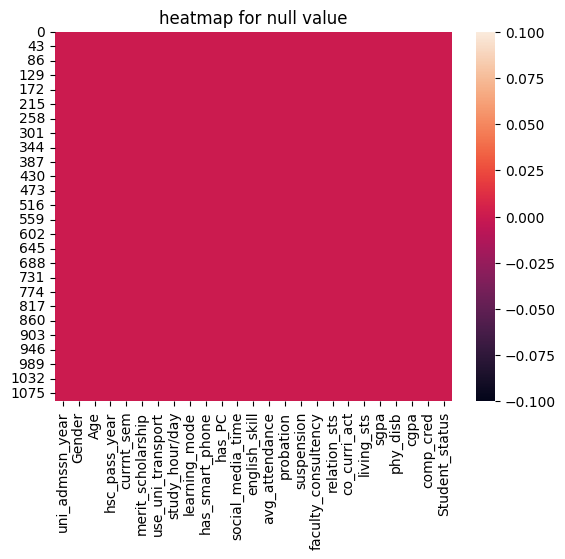

In [103]:
# show the null values
plt.title('heatmap for null value')
sns.heatmap(data.isnull())

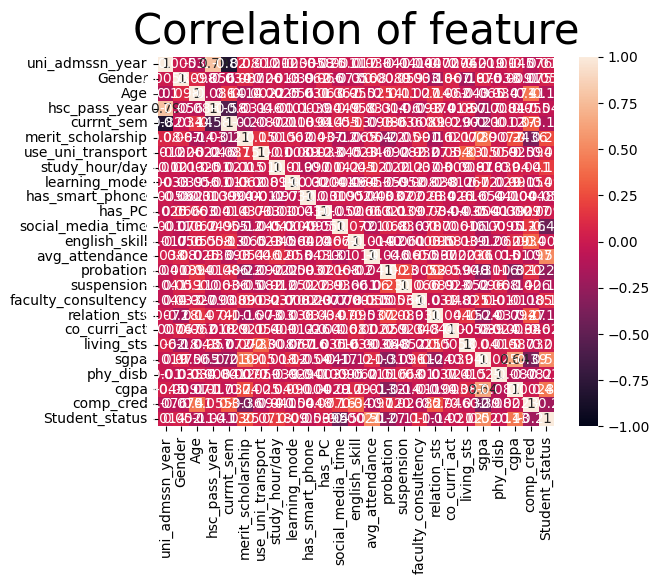

In [104]:
heatmap = sns.heatmap(fenc.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation of feature', fontdict={'fontsize':30}, pad=10);

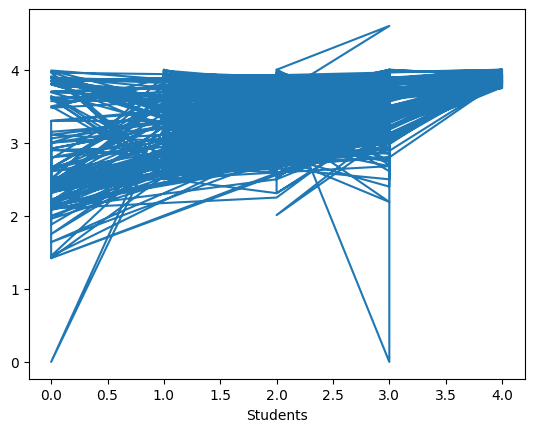

In [105]:
fig, axes = plt.subplots()
plt.xlabel("Students")
axes.plot(fenc['Student_status'],fenc['cgpa'])

In [106]:
fenc.corr()

,uni_admssn_year,Gender,Age,hsc_pass_year,currnt_sem,merit_scholarship,use_uni_transport,study_hour/day,learning_mode,has_smart_phone,...,suspension,faculty_consultency,relation_sts,co_curri_act,living_sts,sgpa,phy_disb,cgpa,comp_cred,Student_status
uni_admssn_year,1.000000,0.005288,-0.103725,0.785705,-0.824803,0.079675,0.011799,-0.011652,0.003266,-0.005771,...,-0.040881,-0.043654,0.007192,-0.007393,0.062476,-0.019021,-0.010215,0.044993,-0.076197,0.013680
Gender,0.005288,1.000000,0.097581,-0.056268,-0.034475,0.086679,-0.026214,0.001272,-0.038937,-0.061742,...,0.059471,0.032871,-0.177600,0.066573,-0.180283,0.075443,-0.032556,-0.009113,-0.075385,0.051672
Age,-0.103725,0.097581,1.000000,-0.085641,0.137587,-0.142705,0.002151,0.002510,-0.056163,-0.031138,...,0.111074,0.027307,0.144807,0.062269,-0.042653,-0.064619,0.033614,-0.071290,0.412664,-0.107112
hsc_pass_year,0.785705,-0.056268,-0.085641,1.000000,-0.575880,-0.031266,-0.045914,-0.010388,-0.010414,0.003876,...,-0.060252,-0.093334,0.074170,-0.017980,0.056561,-0.172614,-0.008418,0.016712,0.054508,-0.041390
currnt_sem,-0.824803,-0.034475,0.137587,-0.575880,1.000000,-0.196368,-0.087455,-0.020575,-0.013131,0.009358,...,0.035998,-0.008896,0.100185,0.029418,-0.072303,-0.210170,-0.001204,-0.037492,0.299332,-0.129700
merit_scholarship,0.079675,0.086679,-0.142705,-0.031266,-0.196368,1.000000,0.148068,0.014952,0.062138,-0.040317,...,-0.049545,0.090834,-0.158013,0.020500,0.071938,0.390469,0.007719,0.243908,-0.360074,0.249948
use_uni_transport,0.011799,-0.026214,0.002151,-0.045914,-0.087455,0.148068,1.000000,0.010200,-0.008864,0.001207,...,-0.081504,0.031614,-0.072545,0.053678,0.327627,0.148793,0.059198,0.025394,-0.094334,0.069780
study_hour/day,-0.011652,0.001272,0.002510,-0.010388,-0.020575,0.014952,0.010200,1.000000,0.019357,-0.097005,...,0.011536,0.037090,-0.030053,0.009047,-0.008706,0.018141,-0.038667,0.040045,0.040586,0.180243
learning_mode,0.003266,-0.038937,-0.056163,-0.010414,-0.013131,0.062138,-0.008864,0.019357,1.000000,-0.032058,...,-0.052183,-0.008230,-0.038404,-0.012172,-0.066998,0.116306,-0.029283,0.091179,-0.054291,0.090089
has_smart_phone,-0.005771,-0.061742,-0.031138,0.003876,0.009358,-0.040317,0.001207,-0.097005,-0.032058,1.000000,...,0.021789,0.002336,0.034036,-0.026457,0.016006,-0.054319,-0.041250,-0.004038,0.004846,-0.052659


In [107]:
fenc[fenc.columns[0:]].corr()['Student_status'][:].sort_values(ascending=False).to_frame()

,Student_status
Student_status,1.000000
sgpa,0.520648
avg_attendance,0.507139
cgpa,0.428028
merit_scholarship,0.249948
study_hour/day,0.180243
faculty_consultency,0.104984
learning_mode,0.090089
use_uni_transport,0.069780
Gender,0.051672


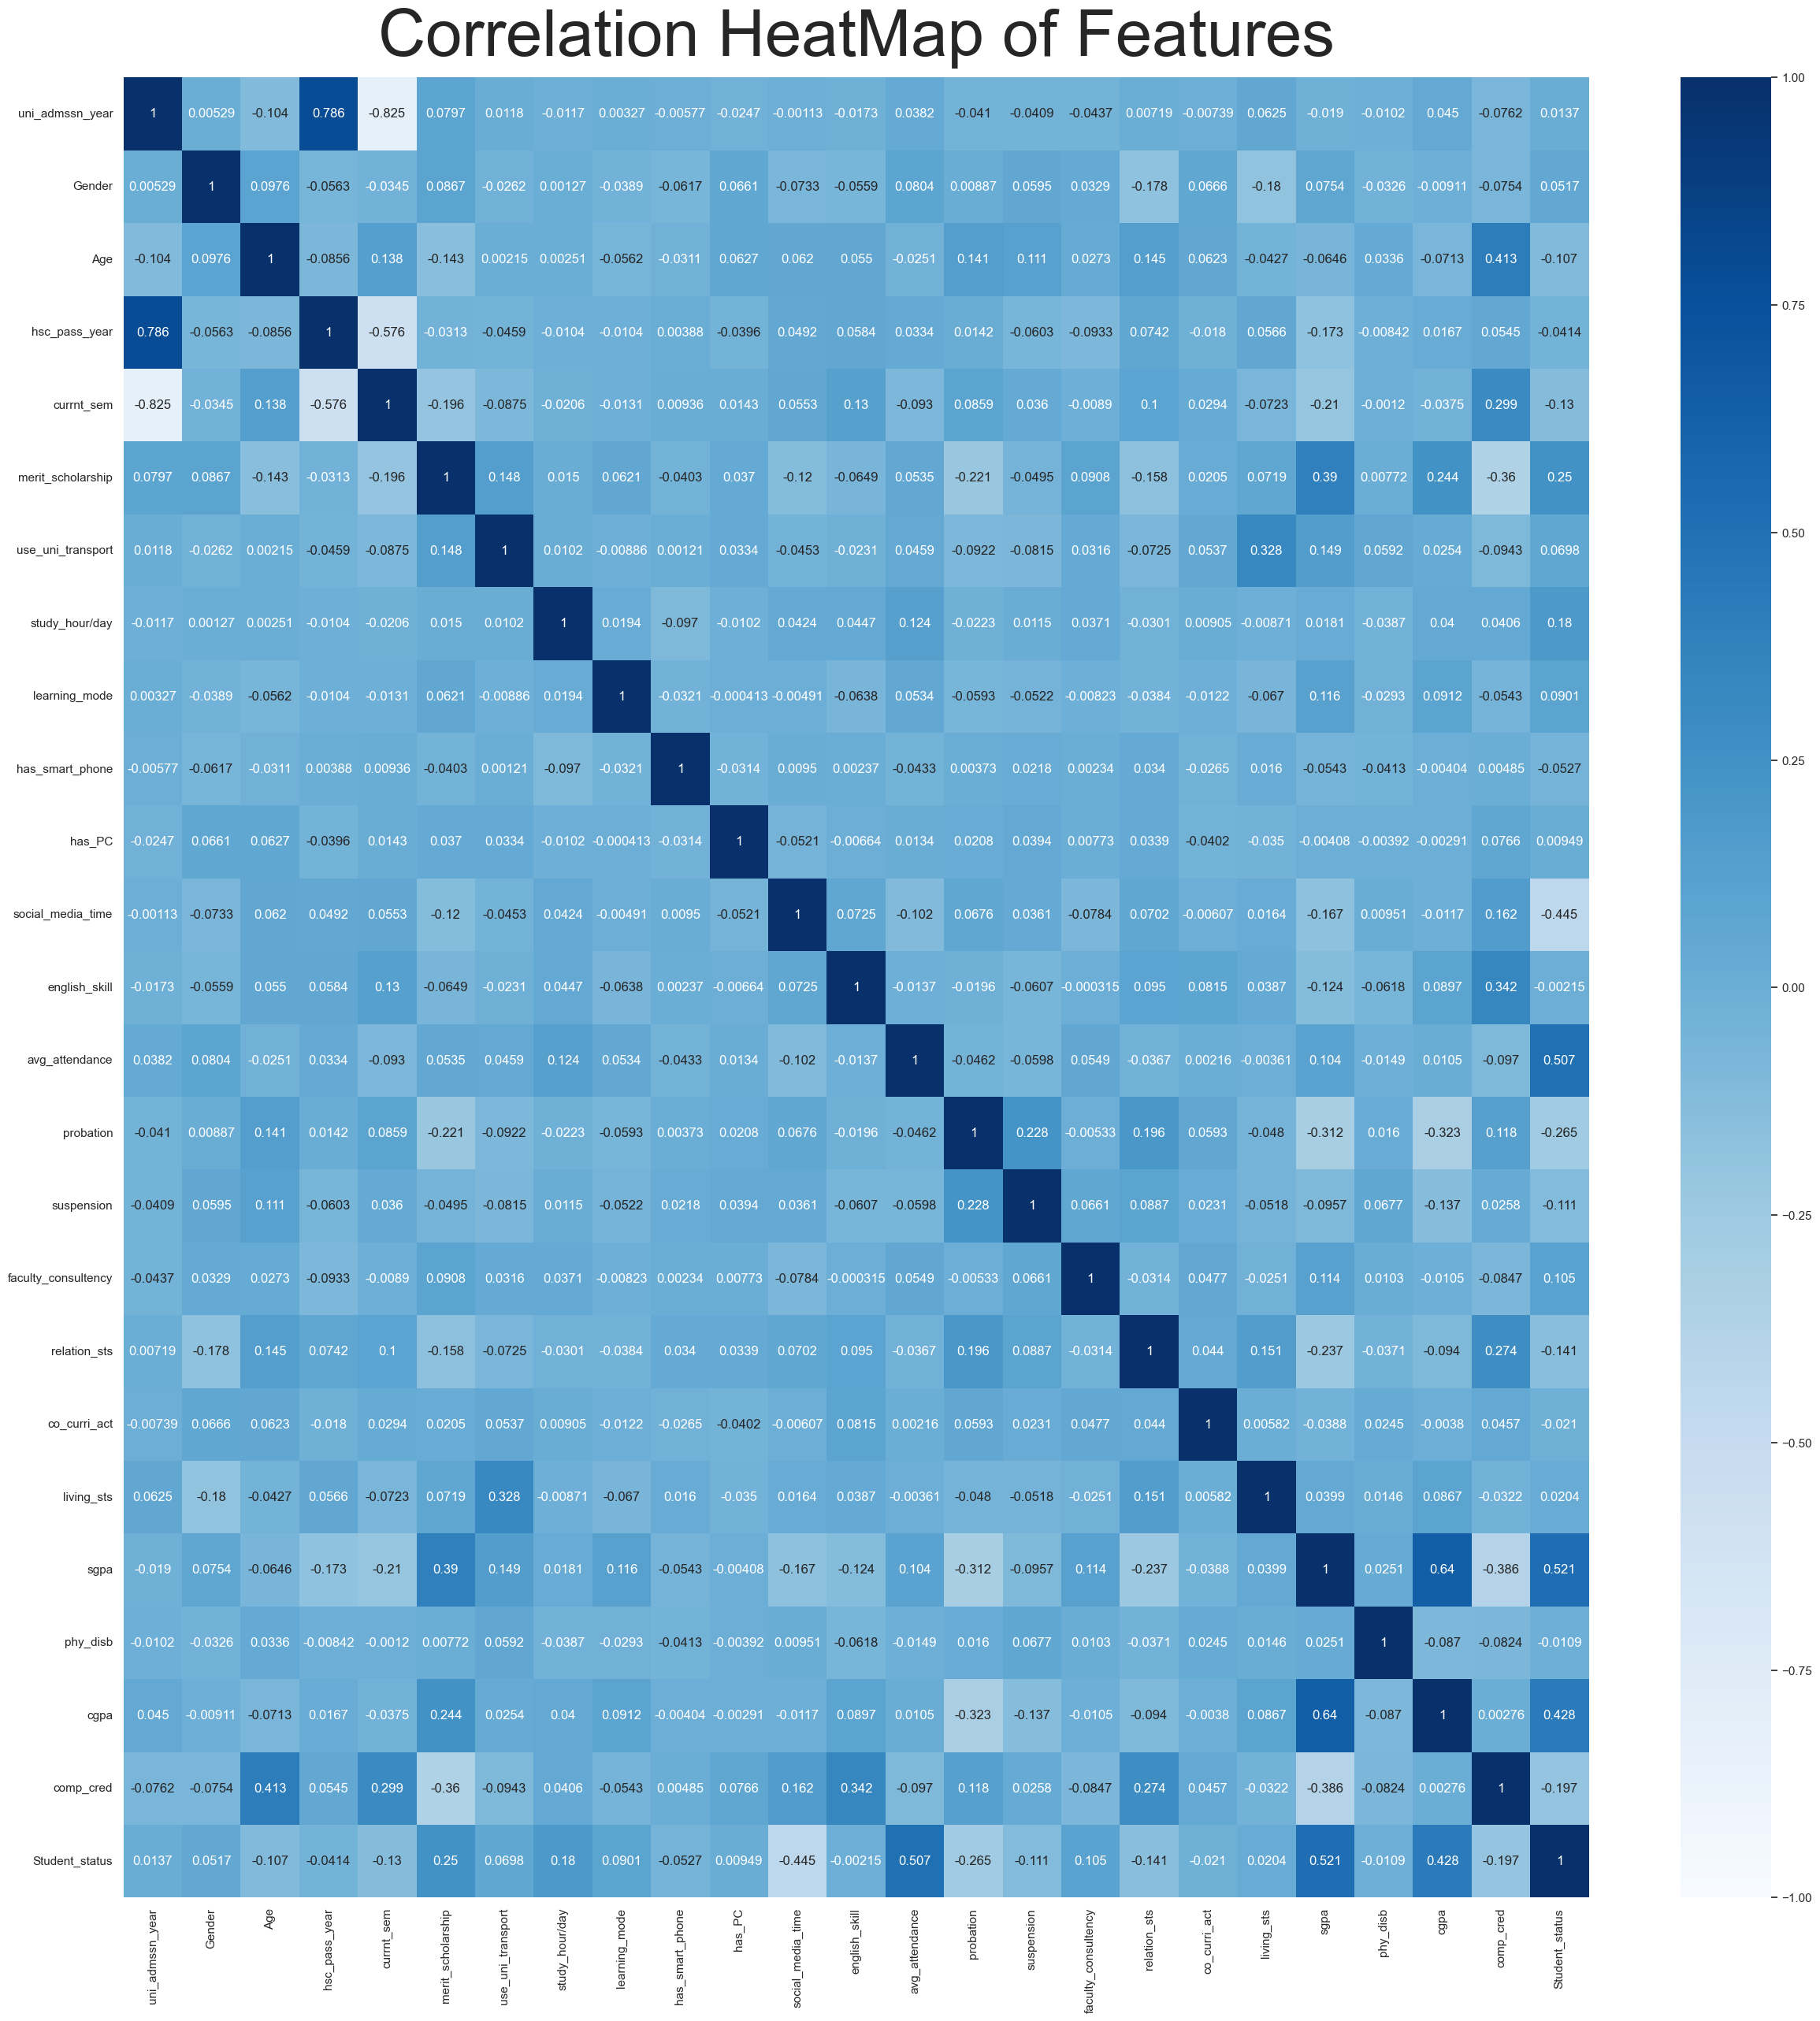

In [108]:
plt.figure(figsize=(30,30))
sns.set_theme(style="white")
corr = fenc.corr()
heatmap1 = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="Blues", fmt='.3g')
heatmap1.set_title('Correlation HeatMap of Features',fontdict={'fontsize':60}, pad = 20);

In [109]:
h_corr = heatmap1.get_figure()
h_corr.savefig("Diagram/Heat_map_corr.png",dpi=200)

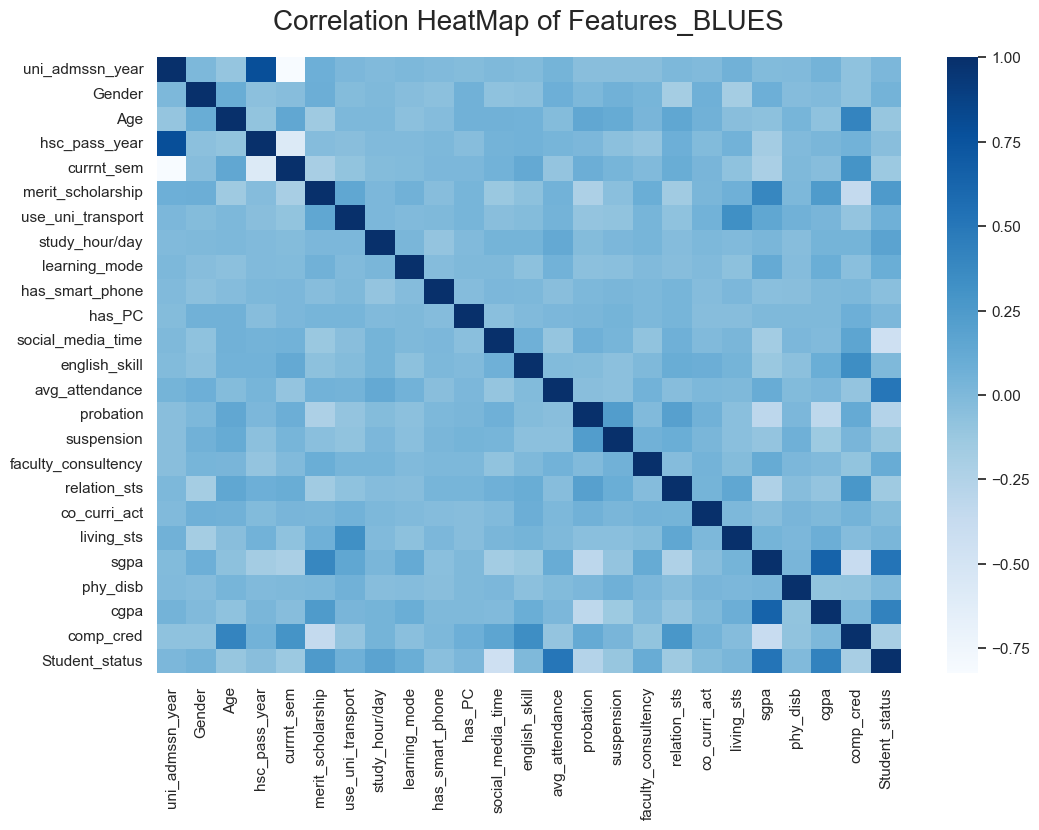

In [110]:
plt.figure(figsize=(12,8))
sns.set_theme(style="white")
corr = fenc.corr()
heatmap2 = sns.heatmap(corr, cmap="Blues")
heatmap2.set_title('Correlation HeatMap of Features_BLUES',fontdict={'fontsize':20}, pad = 20);

In [111]:
h_corr = heatmap.get_figure()
h_corr.savefig("Diagram/Heat_map_corr_blues.png",dpi=300)

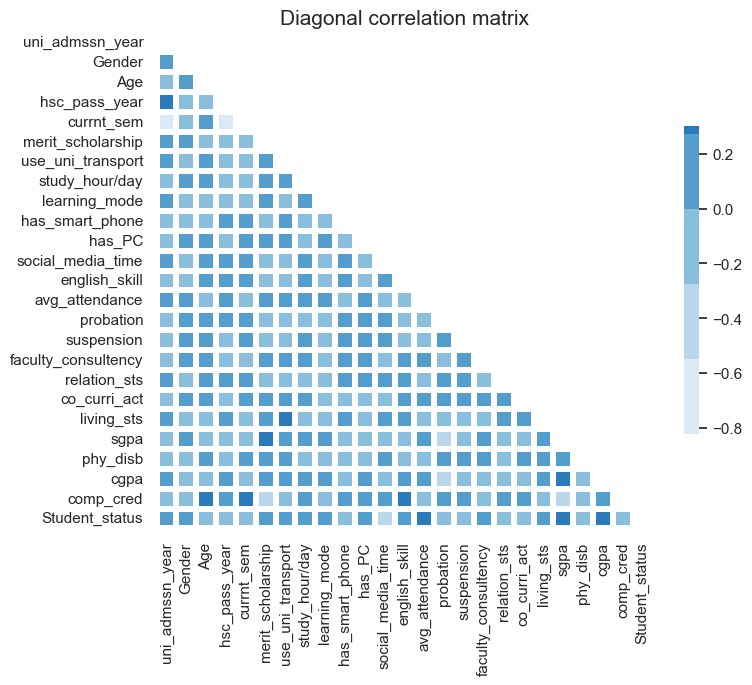

In [112]:
sns.set_theme(style="white")
corr = fenc.corr()
mask = np.triu(fenc.corr())
f, ax = plt.subplots(figsize=(8,8))
cmap = sns.color_palette("Blues")

fig=sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )
fig.set_title('Diagonal correlation matrix',fontdict={'fontsize':15});

In [113]:
h_corr = fig.get_figure()
h_corr.savefig("Diagram/Diagonal_corr_graph.png",dpi=300)

In [114]:
fenc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   uni_admssn_year      1100 non-null   int64  
 1   Gender               1100 non-null   int64  
 2   Age                  1100 non-null   int64  
 3   hsc_pass_year        1100 non-null   int64  
 4   currnt_sem           1100 non-null   int64  
 5   merit_scholarship    1100 non-null   int64  
 6   use_uni_transport    1100 non-null   int64  
 7   study_hour/day       1100 non-null   int64  
 8   learning_mode        1100 non-null   int64  
 9   has_smart_phone      1100 non-null   int64  
 10  has_PC               1100 non-null   int64  
 11  social_media_time    1100 non-null   int64  
 12  english_skill        1100 non-null   int64  
 13  avg_attendance       1100 non-null   int64  
 14  probation            1100 non-null   int64  
 15  suspension           1100 non-null   i

In [115]:
def bar_chart(feature):
    Excellent = fenc[fenc['Student_status'] == 4][feature].value_counts()
    Satisfactory = fenc[fenc['Student_status'] == 3][feature].value_counts()
    Moderate = fenc[fenc['Student_status'] == 2][feature].value_counts()
    Bad = fenc[fenc['Student_status'] == 1][feature].value_counts()
    On_Warning = fenc[fenc['Student_status'] == 0][feature].value_counts()
    
    dfbc = pd.DataFrame([Excellent, Satisfactory, Moderate, Bad, On_Warning])
    dfbc.index = ['Excellent', 'Satisfactory', 'Moderate', 'Unsatisfactory', 'Probation']
    dfbc.plot(kind='bar',stacked=True,figsize=(10,6))

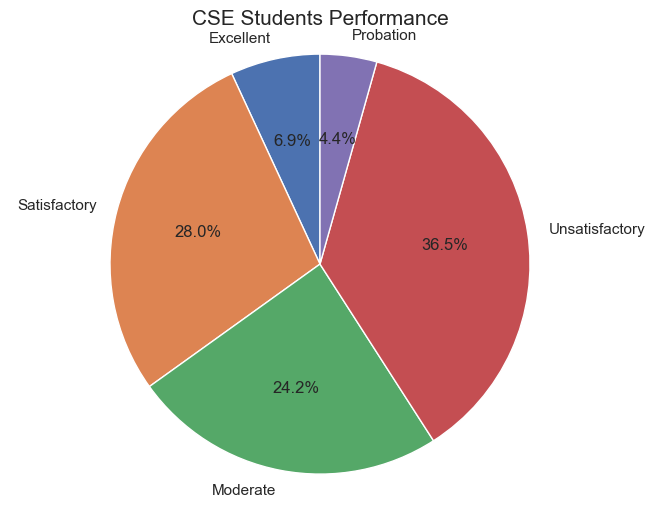

In [116]:
import matplotlib.pyplot as plt

def single_pie_chart():
    # Count occurrences of each student status
    status_counts = fenc['Student_status'].value_counts()

    # Define the labels and sizes for the pie chart
    labels = ['Excellent', 'Satisfactory', 'Moderate', 'Unsatisfactory', 'Probation']
    sizes = [status_counts.get(i, 0) for i in range(len(labels))]  # Handle missing statuses

    # Create the pie chart
    plt.figure(figsize=(8, 6))
    plt.title('CSE Students Performance', fontsize=15)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

    # Save and show the plot
    plt.savefig('Diagram/CSE_Students_Performance.png')
    plt.show()

# Call the function to display the pie chart
single_pie_chart()


In [117]:
import matplotlib.pyplot as plt
import pandas as pd

def pie_chart(feature):
    # Counting the values for each Student Status category
    Excellent = fenc[fenc['Student_status'] == 4][feature].value_counts()
    Satisfactory = fenc[fenc['Student_status'] == 3][feature].value_counts()
    Moderate = fenc[fenc['Student_status'] == 2][feature].value_counts()
    Bad = fenc[fenc['Student_status'] == 1][feature].value_counts()
    On_Warning = fenc[fenc['Student_status'] == 0][feature].value_counts()

    # Creating a DataFrame for pie chart
    dfpc = pd.DataFrame([Excellent, Satisfactory, Moderate, Bad, On_Warning])
    dfpc.index = ['Excellent', 'Satisfactory', 'Moderate', 'Unsatisfactory', 'Probation']

    # Check for empty categories and remove them
    dfpc = dfpc.dropna(axis=1, how='all')  # Drop columns that are entirely NaN

    # Plotting pie charts for each status category
    fig, axs = plt.subplots(1, dfpc.shape[0], figsize=(20, 5))

    for i, status in enumerate(dfpc.index):
        if not dfpc.loc[status].empty:  # Check if the data for this status is not empty
            dfpc.loc[status].plot.pie(ax=axs[i], autopct='%1.1f%%', startangle=90)
            axs[i].set_ylabel('')
            axs[i].set_title(status)
        else:
            axs[i].axis('off')  # Hide the subplot if there's no data

    plt.tight_layout()
    plt.show()


<Figure size 1000x1000 with 0 Axes>

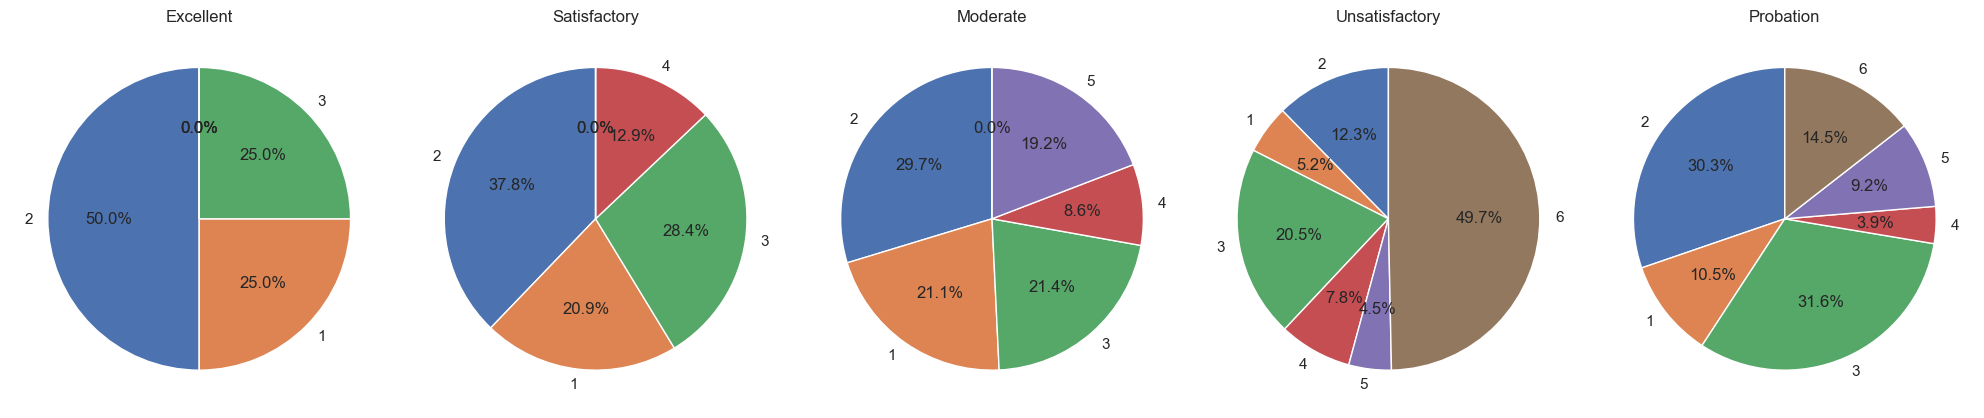

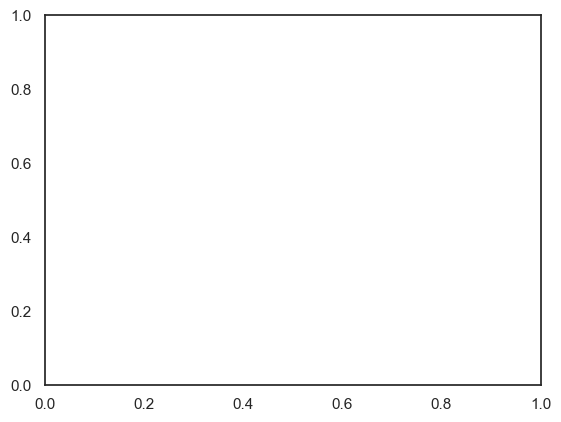

In [118]:
plt.figure(figsize = (10,10))
plt.title(pie_chart('social_media_time'))
plt.savefig('Diagram/Social_Media_Time.png')
plt.show()

<Figure size 1000x1000 with 0 Axes>

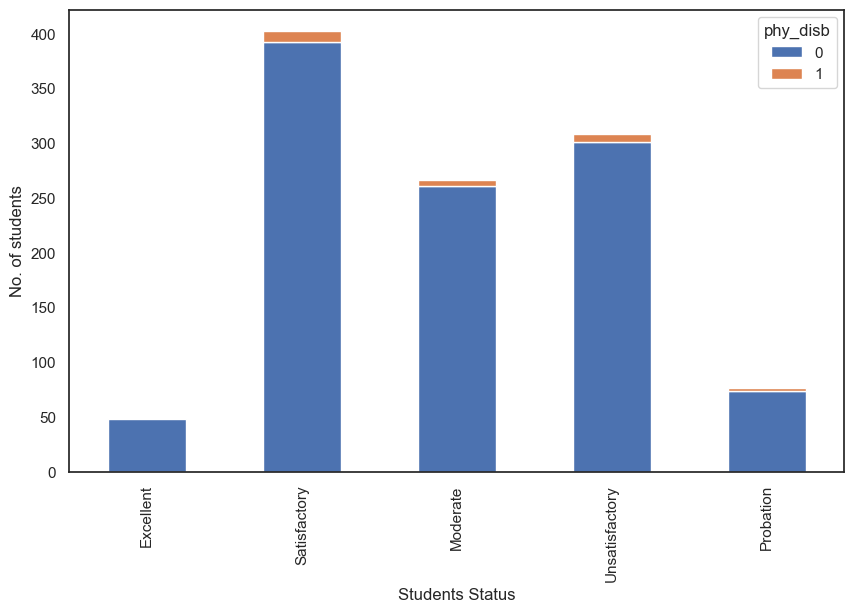

In [119]:
plt.figure(figsize = (10,10))
plt.title(bar_chart('phy_disb'))
plt.xlabel("Students Status")
plt.ylabel("No. of students")

plt.savefig('Diagram/physical disability.png')
plt.show()

<Figure size 1000x1000 with 0 Axes>

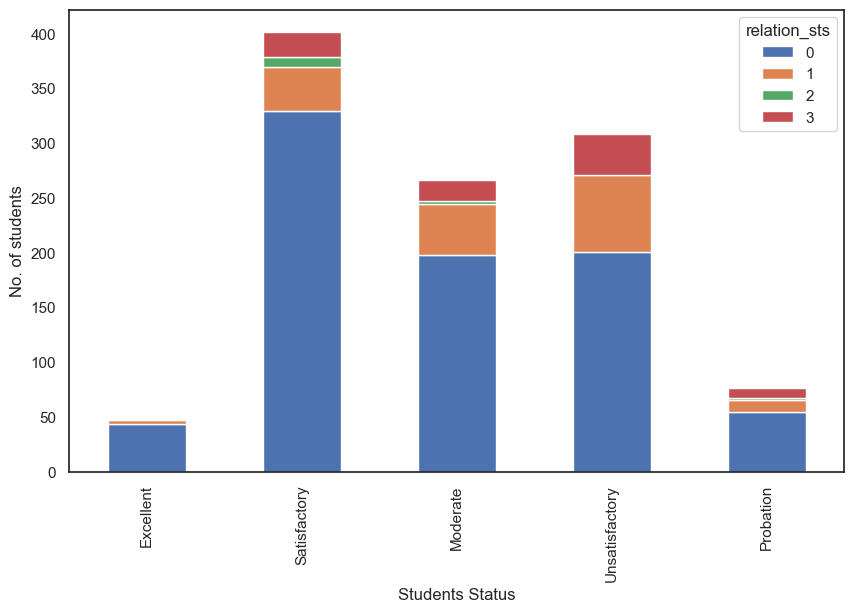

In [120]:
plt.figure(figsize = (10,10))
plt.title(bar_chart('relation_sts'))
plt.xlabel("Students Status")
plt.ylabel("No. of students")

plt.savefig('Diagram/Relationship status.png')
plt.show()

<Figure size 1000x1000 with 0 Axes>

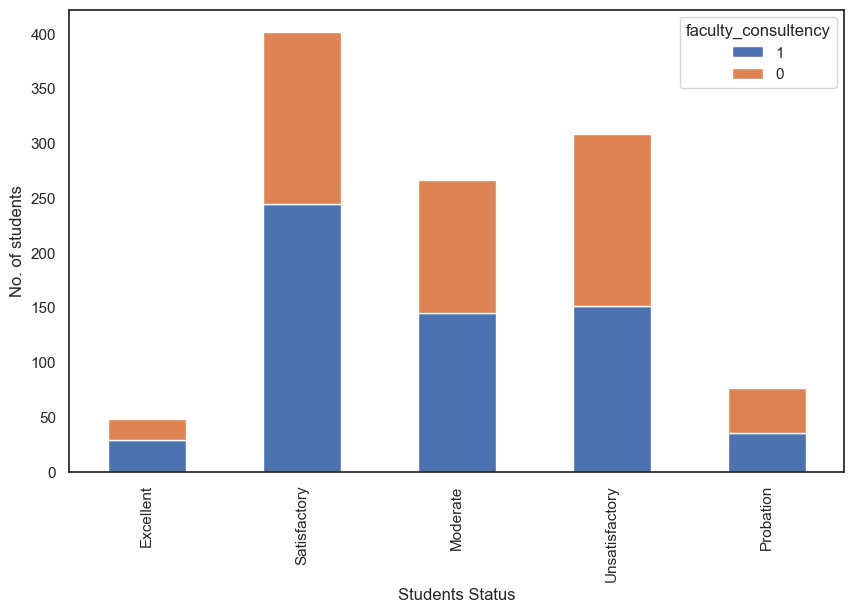

In [121]:
plt.figure(figsize = (10,10))
plt.title(bar_chart('faculty_consultency'))
plt.xlabel("Students Status")
plt.ylabel("No. of students")

plt.savefig('Diagram/Faculty Consultancy.png')
plt.show()

In [122]:
final_df = fenc

In [123]:
final_df.to_csv("Datasets/Final_DataFrame.csv")

In [124]:
final_df.head()

,uni_admssn_year,Gender,Age,hsc_pass_year,currnt_sem,merit_scholarship,use_uni_transport,study_hour/day,learning_mode,has_smart_phone,...,suspension,faculty_consultency,relation_sts,co_curri_act,living_sts,sgpa,phy_disb,cgpa,comp_cred,Student_status
0,2018,1,24,2016,12,1,0,3,1,1,...,0,1,0,1,0,2.81,0,3.3,77,2
1,2021,1,22,2020,4,1,1,3,0,1,...,0,0,0,1,1,2.81,0,3.3,77,3
2,2020,0,21,2019,5,0,0,3,1,1,...,0,1,0,0,0,2.81,0,3.3,77,2
3,2021,1,20,2020,4,1,0,1,1,1,...,0,1,0,0,0,2.81,0,3.3,77,2
4,2021,1,22,2019,4,1,0,3,0,1,...,0,1,1,0,0,2.81,0,3.3,77,2


# Train Test splitting

In [125]:
X = final_df.drop('Student_status', axis=1)
y = final_df['Student_status']

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.96      0.98      0.97        55
           2       0.94      0.98      0.96        59
           3       0.99      0.96      0.98        85
           4       0.89      1.00      0.94         8

    accuracy                           0.96       220
   macro avg       0.96      0.94      0.94       220
weighted avg       0.97      0.96      0.96       220

Confusion Matrix:


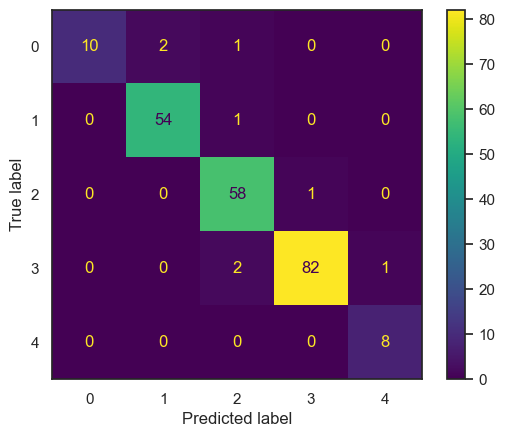

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import joblib

# Assuming X_train, y_train, X_test, and y_test are already defined

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Save the model
joblib.dump(dt, 'Model/best_model.joblib')

# Load the model
loaded_dt = joblib.load('Model/best_model.joblib')

y_pred = loaded_dt.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
disp.plot()

plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.89      1.00      0.94        55
           2       0.98      0.88      0.93        59
           3       0.92      0.99      0.95        85
           4       0.83      0.62      0.71         8

    accuracy                           0.93       220
   macro avg       0.92      0.82      0.86       220
weighted avg       0.93      0.93      0.92       220

Random Forest Confusion Matrix:


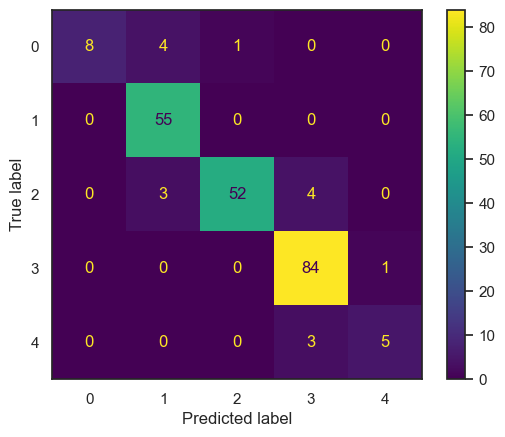

In [128]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
disp_rf = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf))
disp_rf.plot()

plt.show()


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.31      0.44        13
           1       0.47      0.49      0.48        55
           2       1.00      0.03      0.07        59
           3       0.50      0.91      0.64        85
           4       0.00      0.00      0.00         8

    accuracy                           0.50       220
   macro avg       0.55      0.35      0.33       220
weighted avg       0.62      0.50      0.41       220

Logistic Regression Confusion Matrix:


c:\Users\Abdullah Miraz\Documents\GitHub\Student-Performance-Analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Abdullah Miraz\Documents\GitHub\Student-Performance-Analysis\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Abdullah Miraz\Documents\GitHub\Student-Performance-Ana

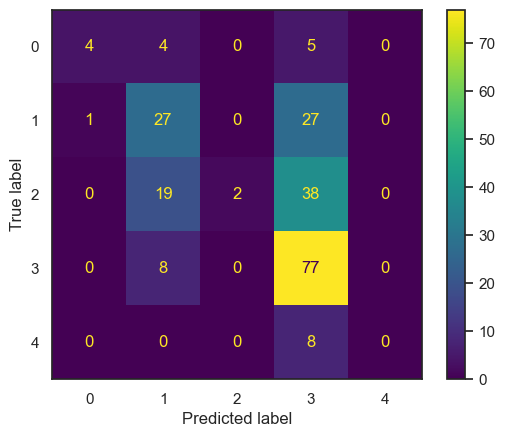

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Logistic Regression Confusion Matrix:")
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_log_reg))
disp_log_reg.plot()

plt.show()



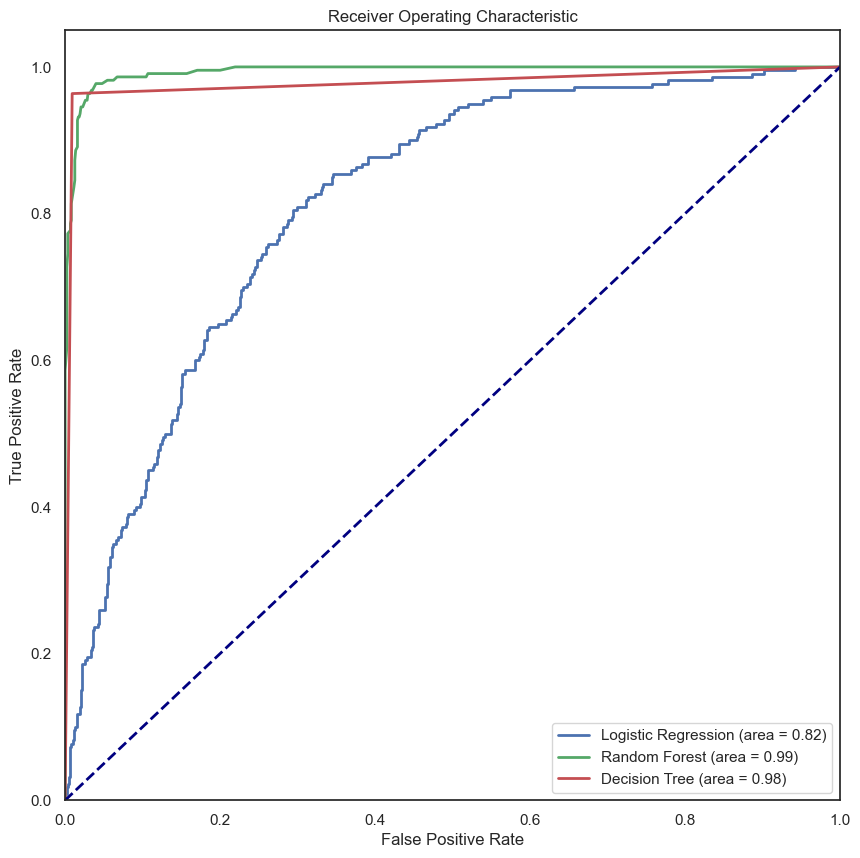

In [130]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Define the models
models = [log_reg, rf, dt]

# Define the model names
model_names = ['Logistic Regression', 'Random Forest', 'Decision Tree']

# Define the colors for the ROC curves
colors = ['b', 'g', 'r']

# Get the number of classes
n_classes = len(np.unique(y_test))

# Plot the ROC curves for each model
plt.figure(figsize=(10, 10))

# One-vs-Rest approach (OvR)
for i, model in enumerate(models):
    # For multiclass problems, we need to binarize the output and calculate ROC for each class
    if n_classes == 2:
        # Binary classification case
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i], lw=2, 
                 label='{} (area = {:0.2f})'.format(model_names[i], roc_auc))
    else:
        # Multiclass case - use one-vs-rest approach
        # Binarize the output
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        
        # Get probability estimates for each class
        y_score = model.predict_proba(X_test)
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        for class_idx in range(n_classes):
            fpr[class_idx], tpr[class_idx], _ = roc_curve(
                y_test_bin[:, class_idx], 
                y_score[:, class_idx]
            )
            roc_auc[class_idx] = auc(fpr[class_idx], tpr[class_idx])
        
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        
        # Plot micro-average ROC curve
        plt.plot(fpr["micro"], tpr["micro"], color=colors[i], lw=2,
                 label='{} (area = {:0.2f})'.format(model_names[i], roc_auc["micro"]))

# Add labels and legend
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.show()